## **1**. **importing all libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
%matplotlib inline

sns.set(style="whitegrid")

# **2. Loading dataset**

### Loading the dataset into pandas **dataframe**

In [ ]:
medical_data = pd.read_csv("/content/insurance.csv")

# **3. Exploratory Data Analysis (EDA)**

### displaying the **first five rows**

In [ ]:
medical_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### dispalying the **last five rows**

In [ ]:
medical_data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


### to see how many **rows and columns** the dataset have

In [ ]:
medical_data.shape

(1338, 7)

### To see the **information** of the datset

In [ ]:
medical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### To see the **statistical description** of the numerical features or columns  of the dataset

In [ ]:
medical_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### To check how **many females and males** are there in the dataset

In [ ]:
medical_data['sex'].value_counts()

,count
sex,
male,676
female,662


### To see **how many somker and non-smoker** are there in the dataset

In [ ]:
medical_data['smoker'].value_counts()

,count
smoker,
no,1064
yes,274


### to see the **unique regoins** in the dataset

In [ ]:
medical_data['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

### To check if there is a **null value**

In [ ]:
medical_data.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


### **Visualizing** distributions using **Histograms**

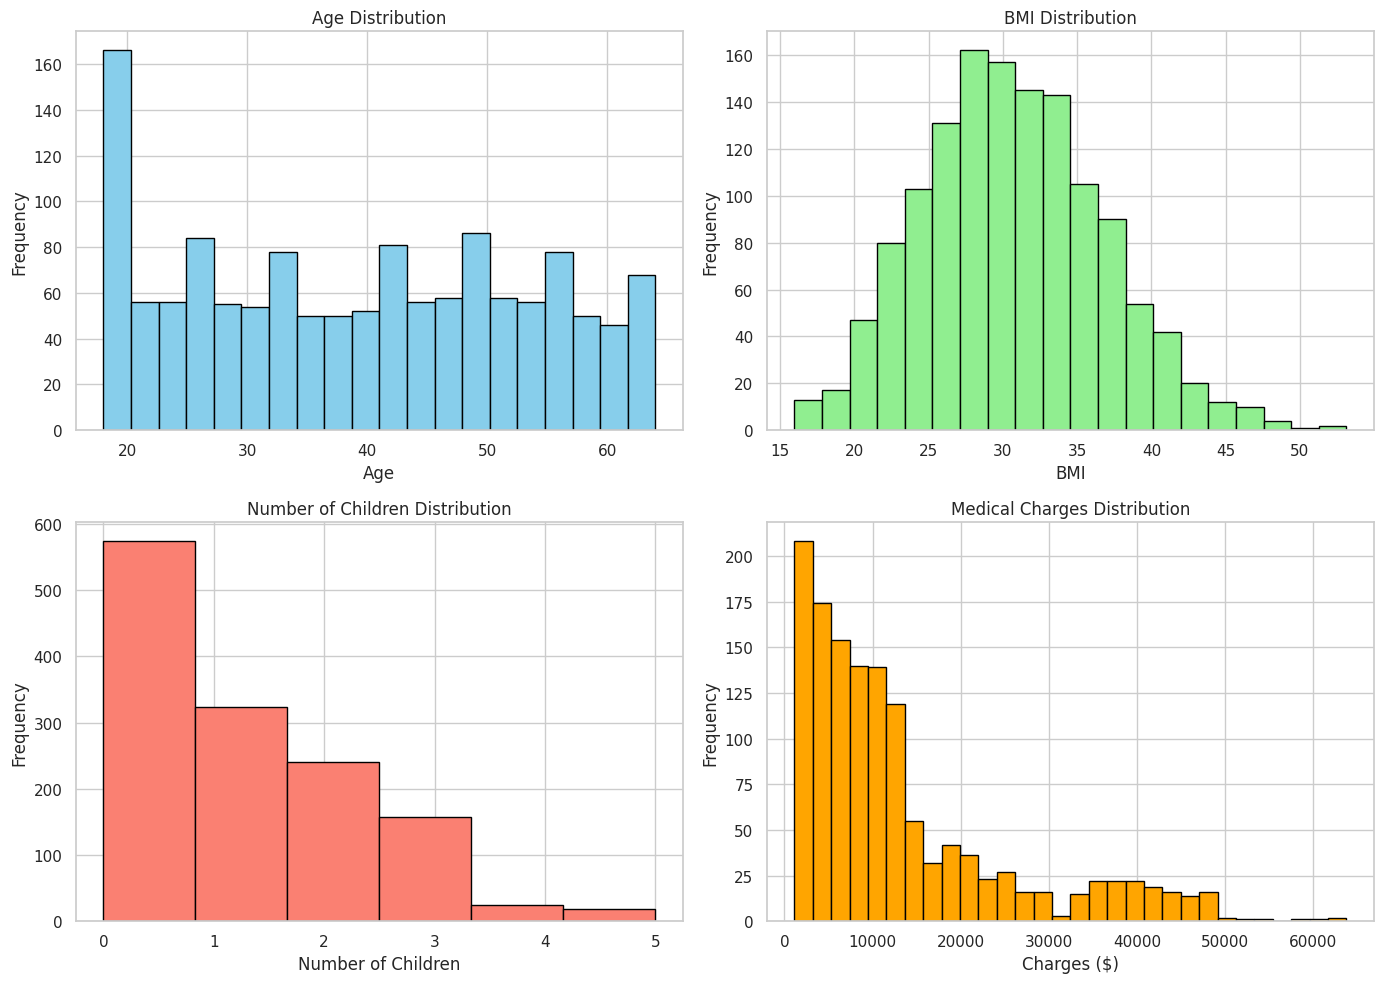

In [ ]:
# Custom histograms with titles and labels
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Age
axes[0, 0].hist(medical_data['age'], bins=20, color='skyblue', edgecolor='black')
axes[0, 0].set_title("Age Distribution")
axes[0, 0].set_xlabel("Age")
axes[0, 0].set_ylabel("Frequency")

# BMI
axes[0, 1].hist(medical_data['bmi'], bins=20, color='lightgreen', edgecolor='black')
axes[0, 1].set_title("BMI Distribution")
axes[0, 1].set_xlabel("BMI")
axes[0, 1].set_ylabel("Frequency")

# Children
axes[1, 0].hist(medical_data['children'], bins=6, color='salmon', edgecolor='black')
axes[1, 0].set_title("Number of Children Distribution")
axes[1, 0].set_xlabel("Number of Children")
axes[1, 0].set_ylabel("Frequency")

# Charges
axes[1, 1].hist(medical_data['charges'], bins=30, color='orange', edgecolor='black')
axes[1, 1].set_title("Medical Charges Distribution")
axes[1, 1].set_xlabel("Charges ($)")
axes[1, 1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()


### **Visualizing** counts using **countplots**

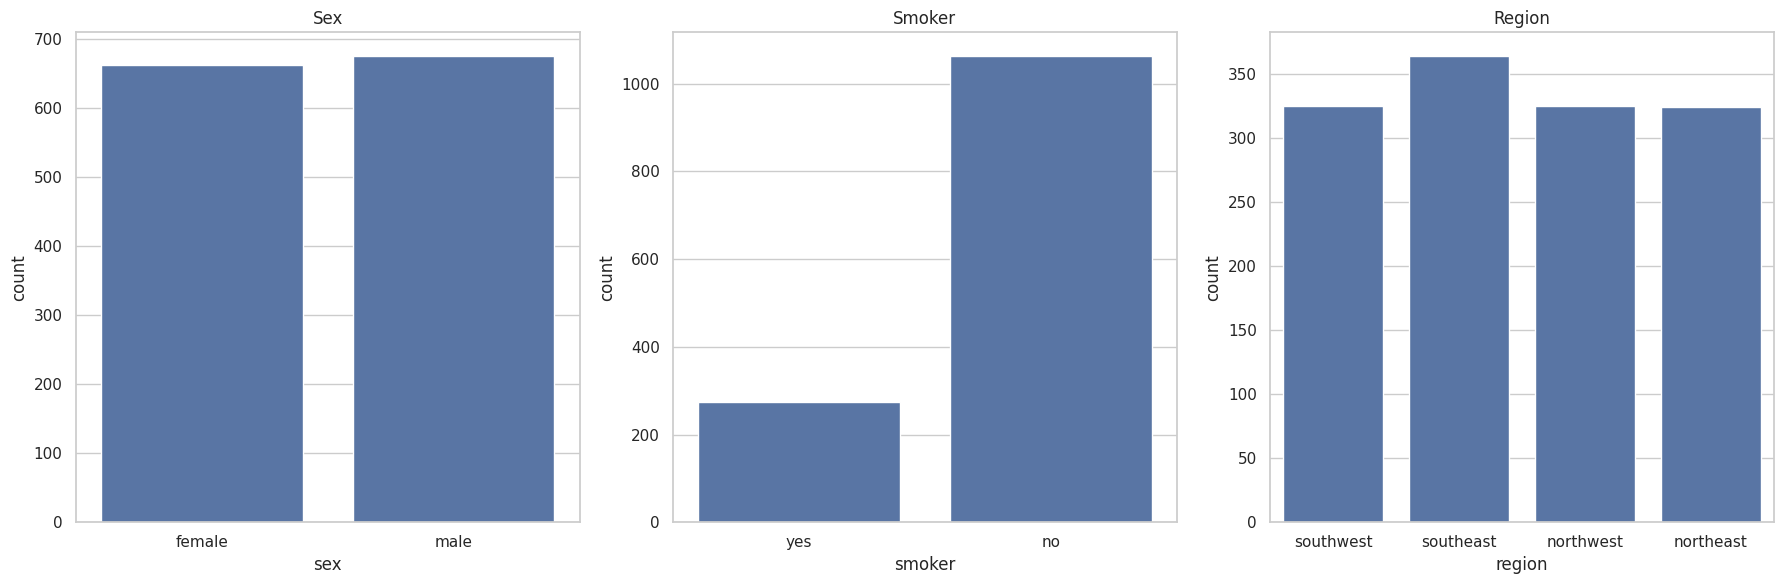

In [ ]:
# Countplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
sns.countplot(data=medical_data, x='sex', ax=axes[0])
sns.countplot(data=medical_data, x='smoker', ax=axes[1])
sns.countplot(data=medical_data, x='region', ax=axes[2])
axes[0].set_title("Sex")
axes[1].set_title("Smoker")
axes[2].set_title("Region")
plt.tight_layout()
plt.show()

### **Visualizing correlations** using **histogram**

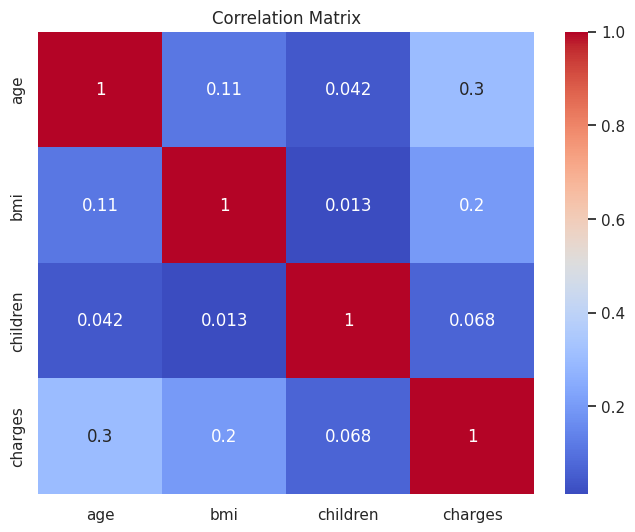

In [ ]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(medical_data.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# **4. Preprocessing**

### **Encode categorical variables**

In [ ]:
medical_data_encoded = medical_data.copy()
medical_data_encoded['sex'] = LabelEncoder().fit_transform(medical_data_encoded['sex'])
medical_data_encoded['smoker'] = LabelEncoder().fit_transform(medical_data_encoded['smoker'])
medical_data_encoded = pd.get_dummies(medical_data_encoded, columns=['region'], drop_first=True)

### **Feature scaling**

In [ ]:
X = medical_data_encoded.drop('charges', axis=1)
y = medical_data_encoded['charges']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### **Train/test split**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## 5. **Train & Evaluate Random Forest Regressor**

In [ ]:
# Initialize and train model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict
y_pred = rf.predict(X_test)

# Evaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Random Forest Regressor Evaluation:")
print(f"RMSE: {rmse:.2f}")
print(f"MAE : {mae:.2f}")
print(f"R²  : {r2:.4f}")


Random Forest Regressor Evaluation:
RMSE: 4569.31
MAE : 2545.83
R²  : 0.8655


##### If we see the above
##### **RMSE: 4569.31**
##### **MAE : 2545.83**
##### **R² = 0.8655**
#### which is  On average, the Random Forest model predicts medical charges within **$2,546** of the actual value, and it captures around **86.6%** of the important patterns in the data.

# **6. Plot Actual vs Predicted**

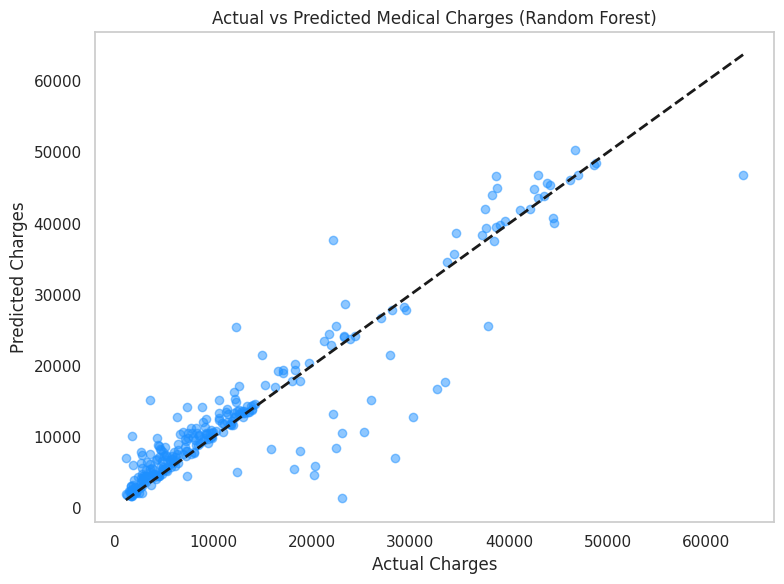

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='dodgerblue')
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted Medical Charges (Random Forest)")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.grid()
plt.tight_layout()
plt.show()
